In [45]:
!pip install opencv-python
!pip install mediapipe

^C


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import tqdm
import mediapipe as mp

In [ ]:
mp_holistic = mp.solutions.holistic
holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)
 
# Initializing the drawing utils for drawing the facial landmarks on image
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connecti

In [ ]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
def extract_keypoints(results):
    pose.append([(res.x, res.y, res.z, res.visibility) for res in results.pose_landmarks.landmark] 
                if results.pose_landmarks else [(0,)*4]*33)
    face.append([(res.x, res.y, res.z) for res in results.face_landmarks.landmark] 
                if results.face_landmarks else [(0,)*3]*468)
    lh.append([(res.x, res.y, res.z) for res in results.left_hand_landmarks.landmark] 
              if results.left_hand_landmarks else [(0,)*3]*21)
    rh.append([(res.x, res.y, res.z) for res in results.right_hand_landmarks.landmark] 
              if results.right_hand_landmarks else [(0,)*3]*21)

In [ ]:
cap = cv2.VideoCapture(0)

In [198]:
alphabet_rh = []

In [257]:
# (0) in VideoCapture is used to connect to your computer's default camera
pose = []
face = []
lh = []
rh = []
capture = cv2.VideoCapture(0)


s = 0
while capture.isOpened():
    # capture frame by frame
    ret, frame = capture.read()

    # resizing the frame for better view
    frame = cv2.resize(frame, (1000, 750))

    # Converting the from BGR to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Making predictions using holistic model
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = holistic_model.process(image)
    image.flags.writeable = True

    # Converting back the RGB image to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Drawing the Facial Landmarks
    draw_styled_landmarks(image, results)
    extract_keypoints(results)

    # Display the resulting image
    cv2.imshow("Facial and Hand Landmarks", image)

    # Enter key 'q' to break the loop
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break
    
    s+=1

    if s == 300:
        break

# When all the process is done
# Release the capture and destroy all windows
capture.release()
cv2.destroyAllWindows()
pose = np.array(pose)
face = np.array(face)
rh = np.array(rh)
lh = np.array(lh)

alphabet_rh.append([r.flatten() for r in rh])

In [279]:
for i in range(len(alphabet_rh)):
    np.savetxt("HandSig/hand_signs_" + alphabet[i] + ".csv", alphabet_rh[i], delimiter=",")

In [258]:
len(alphabet_rh)

26

In [20]:
p = {0: [],
    1: [0],
    2: [1],
    3: [2],
    4: [3],
    5: [0],
    6: [5],
    7: [6],
    8: [7],
    9: [5],
    10: [9],
    11: [10],
    12: [11],
    13: [9],
    14: [13],
    15: [14],
    16: [15],
    17: [0, 13],
    18: [17],
    19: [18],
    20: [19],}

In [25]:
plt.ion()

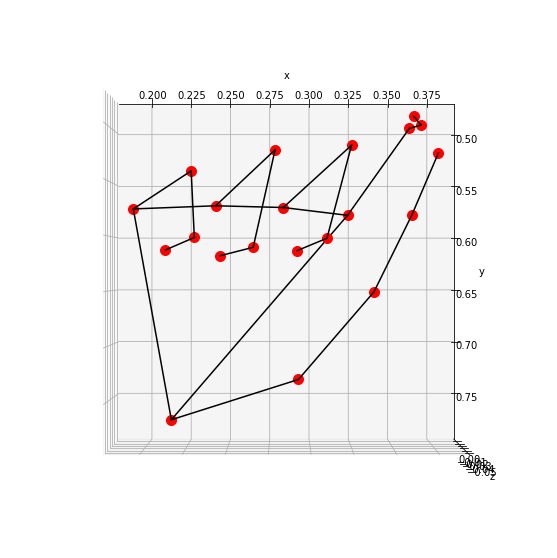

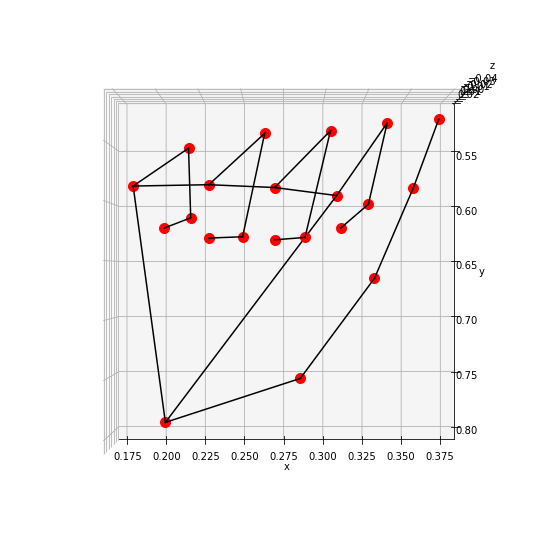

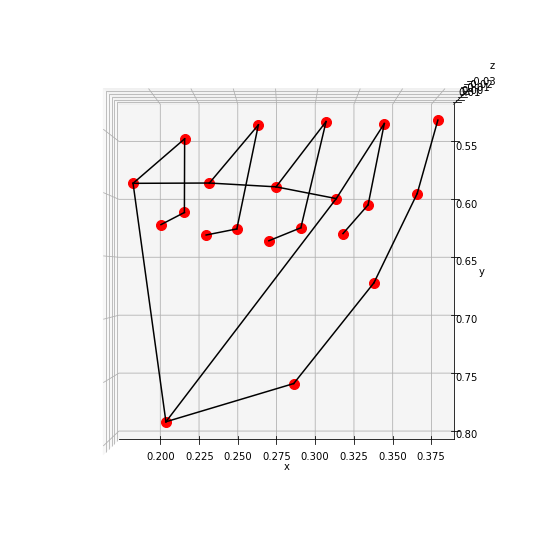

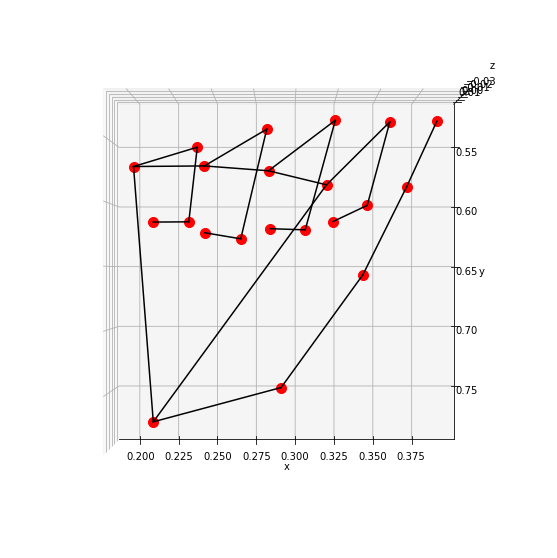

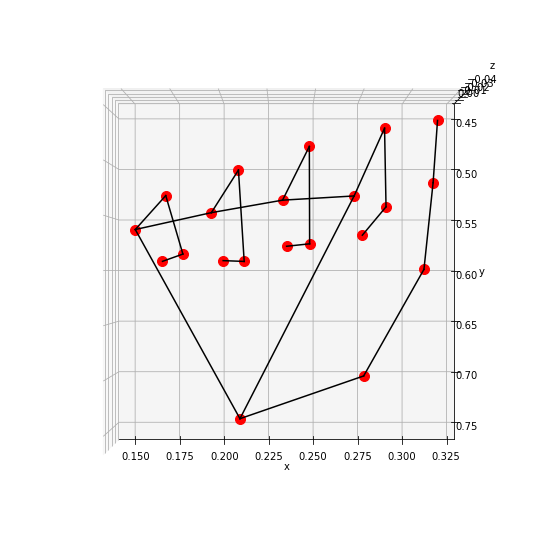

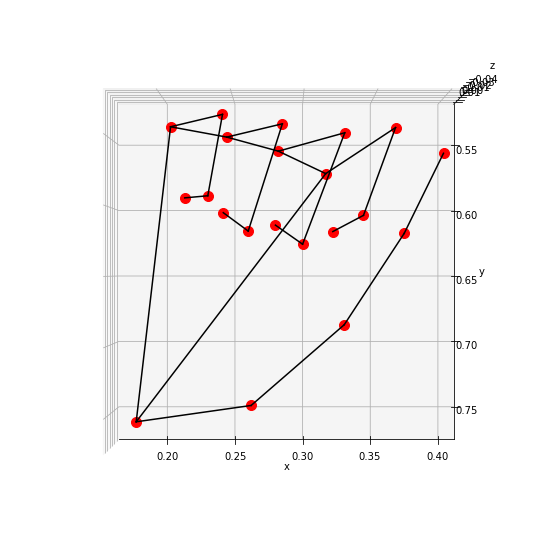

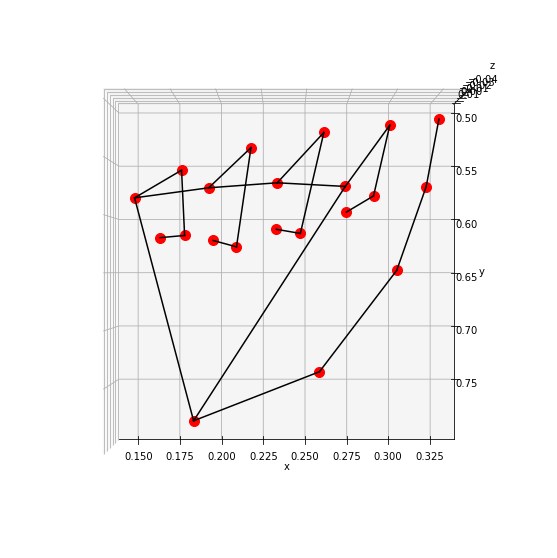

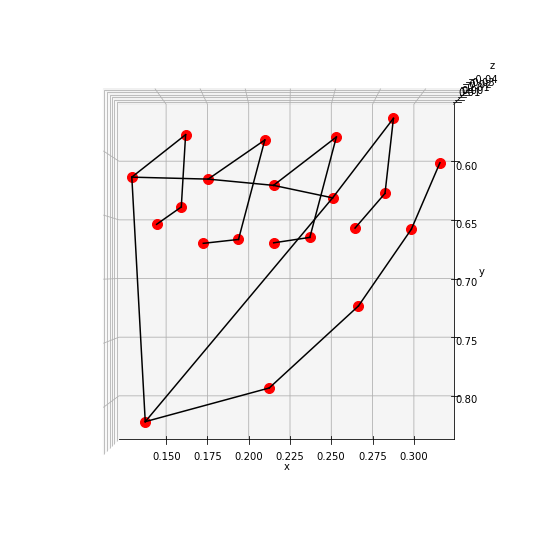

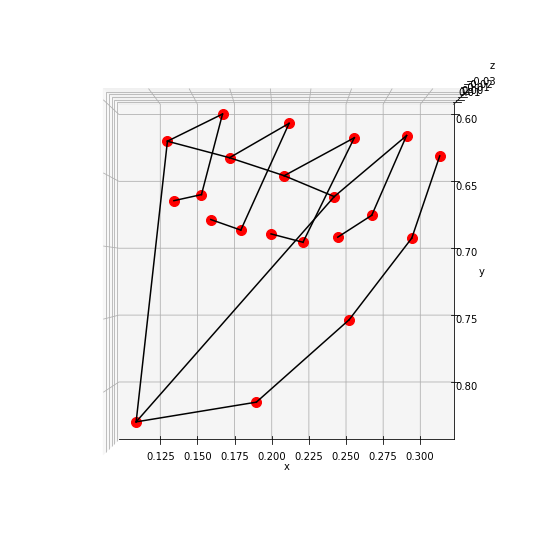

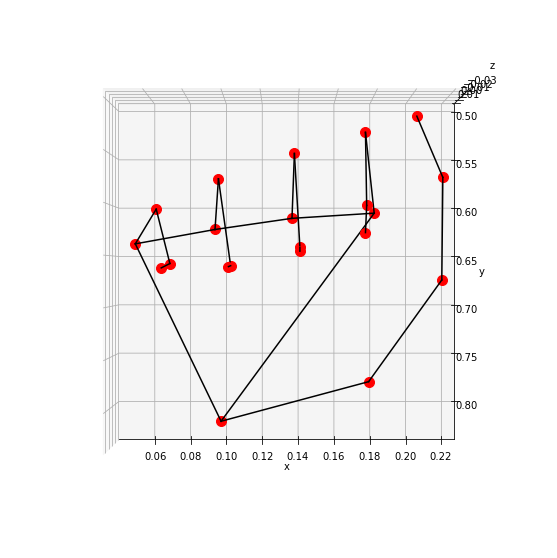

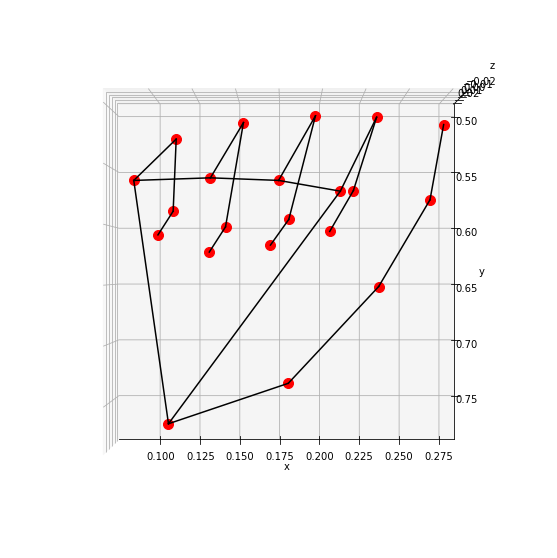

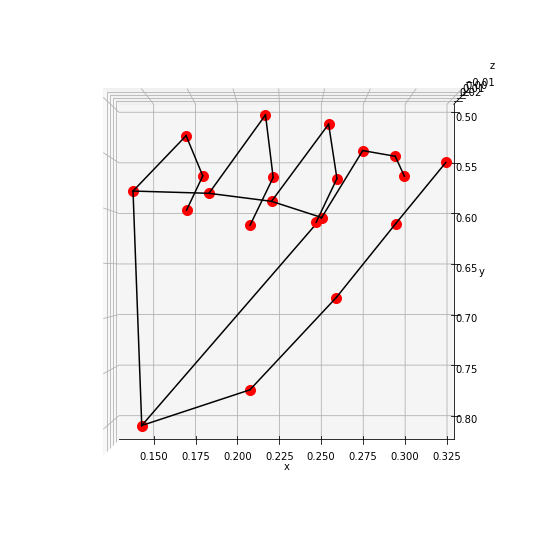

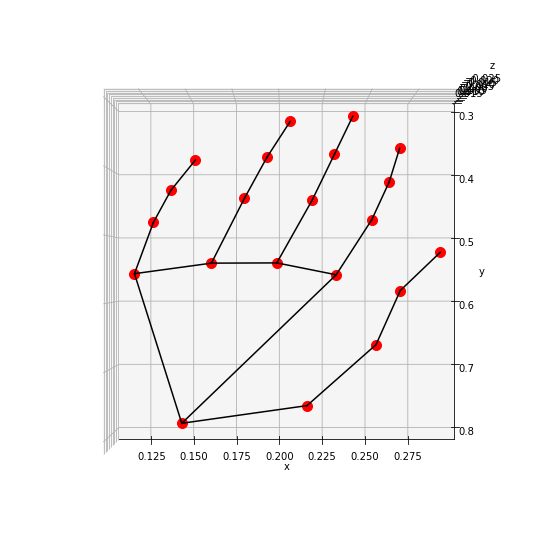

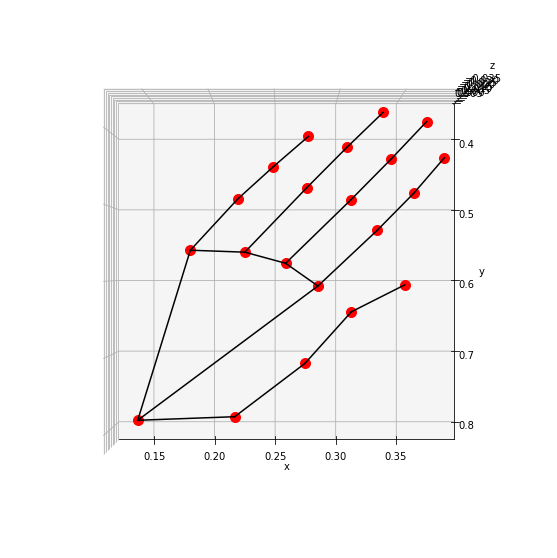

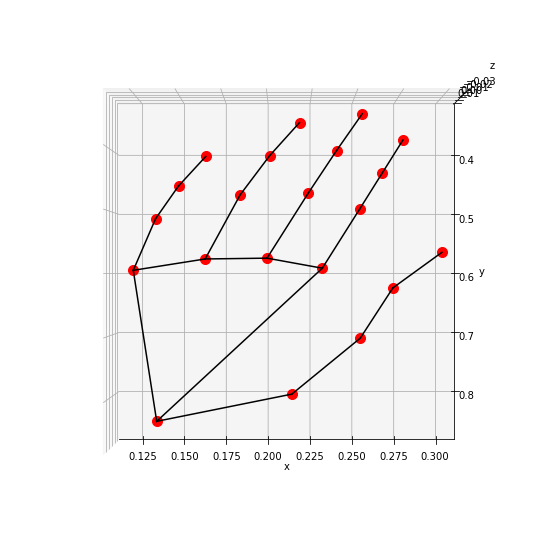

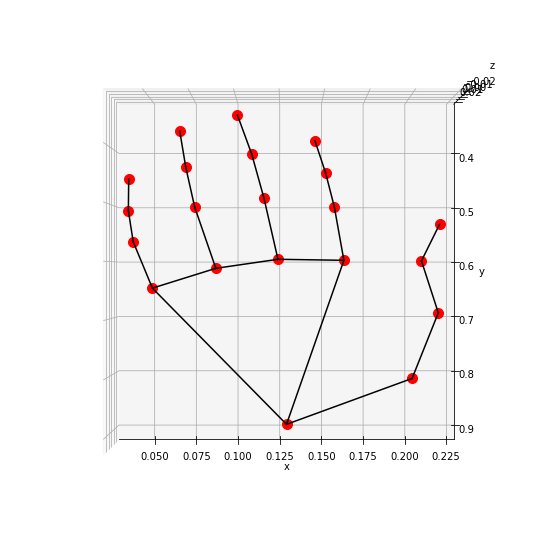

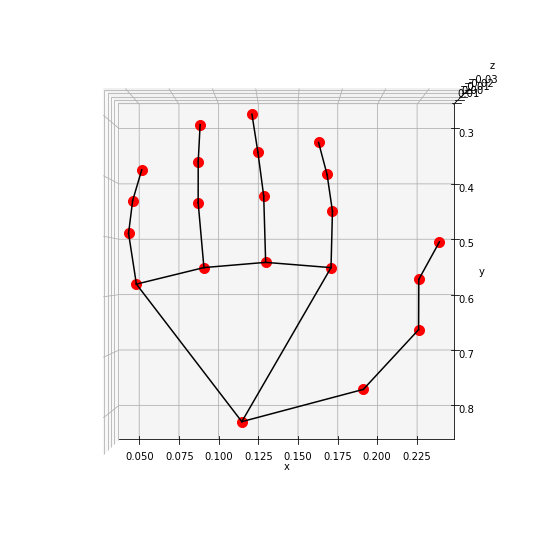

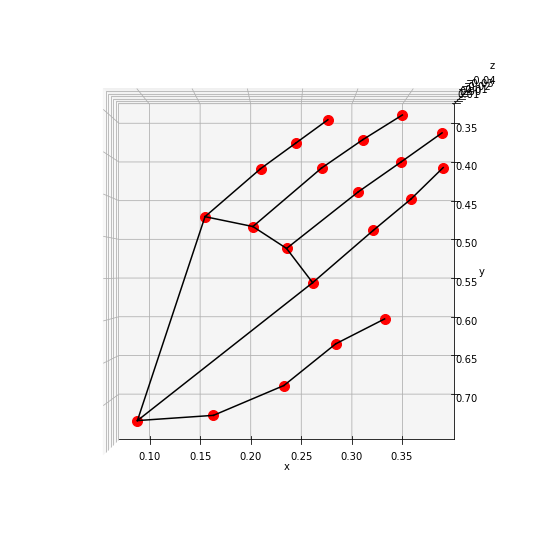

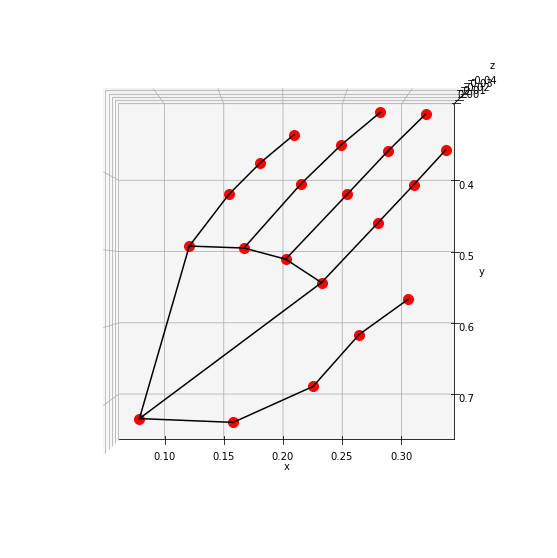

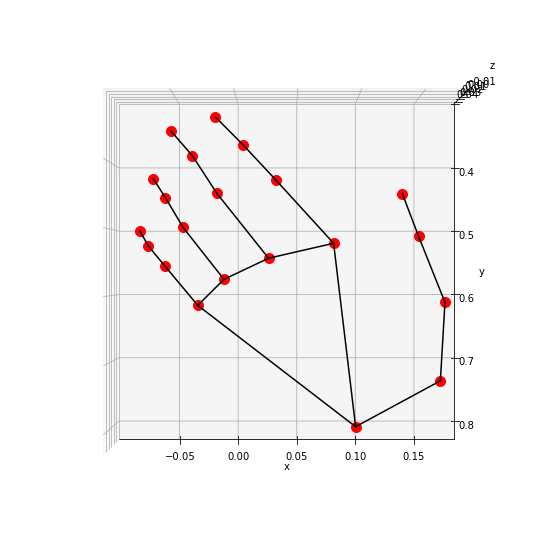

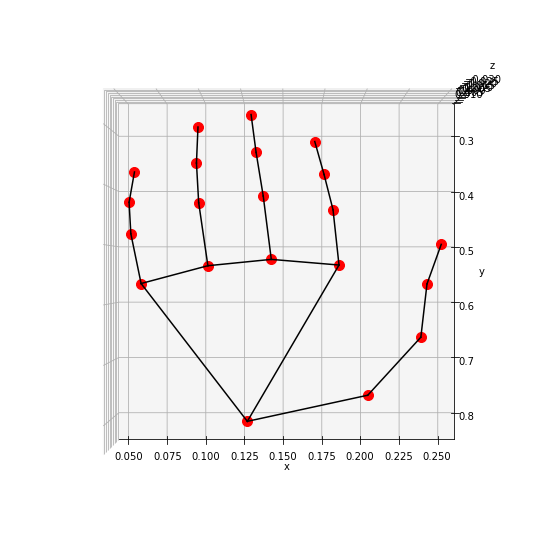

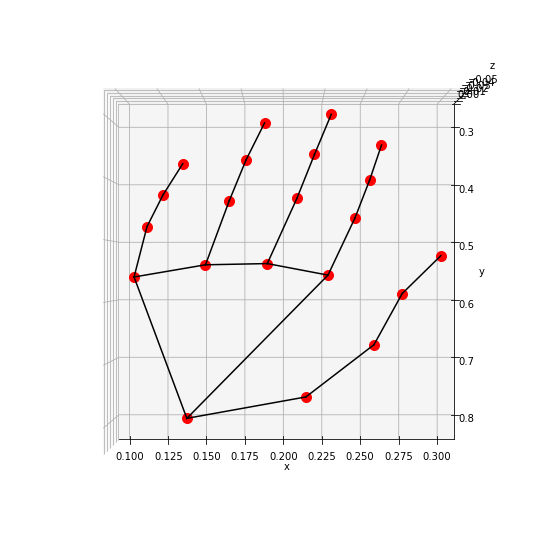

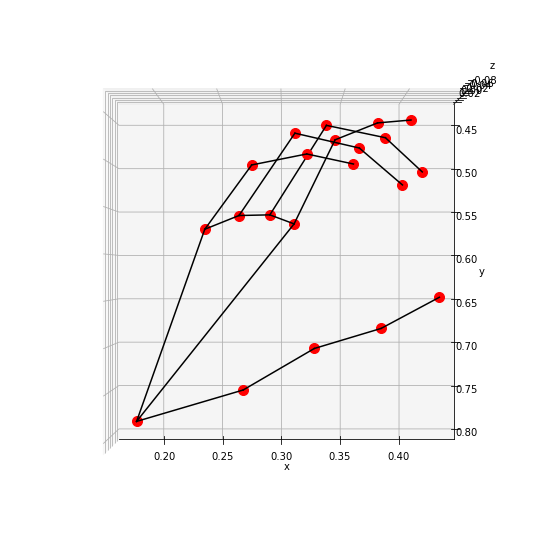

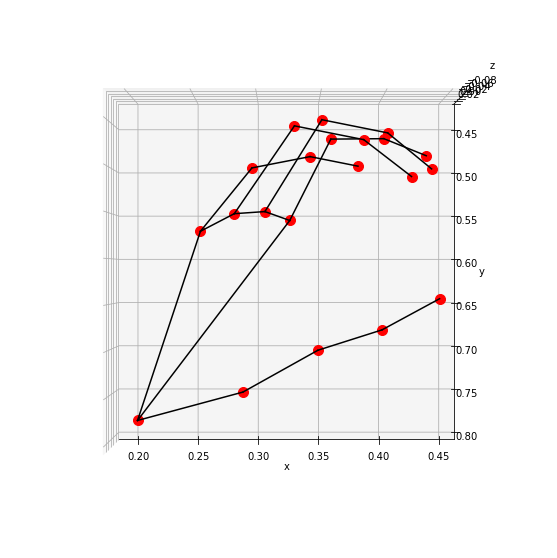

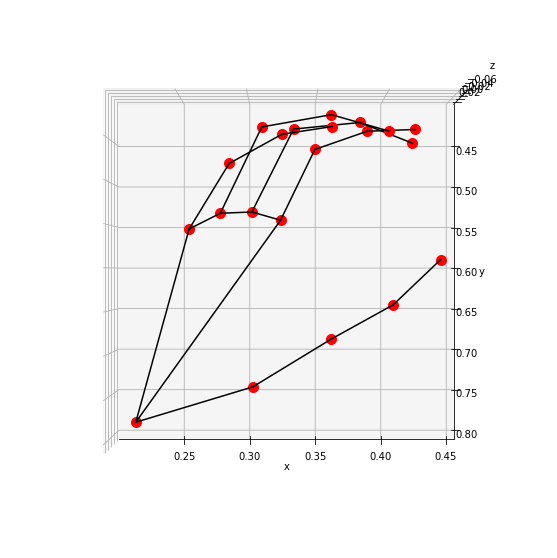

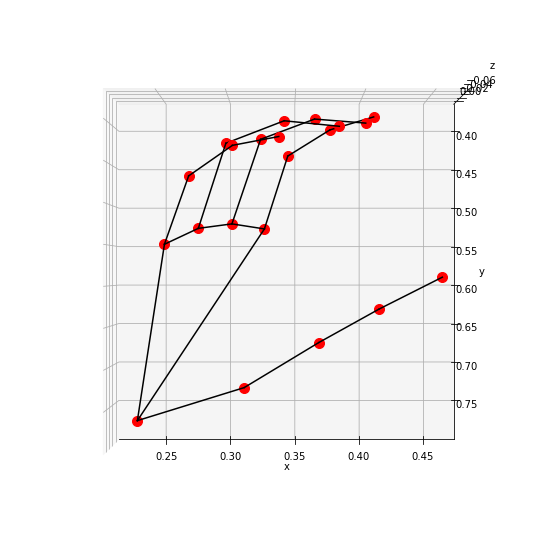

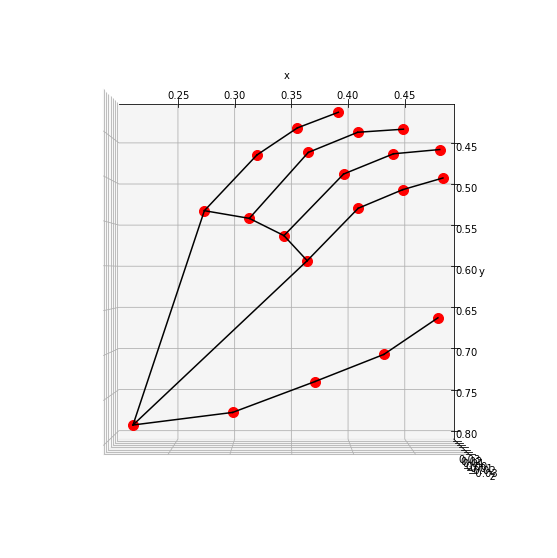

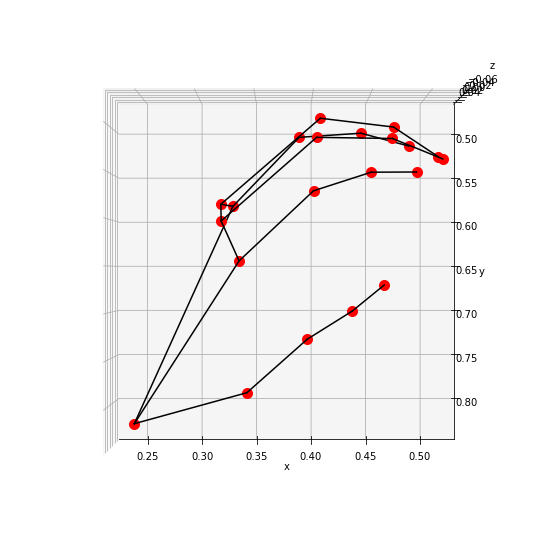

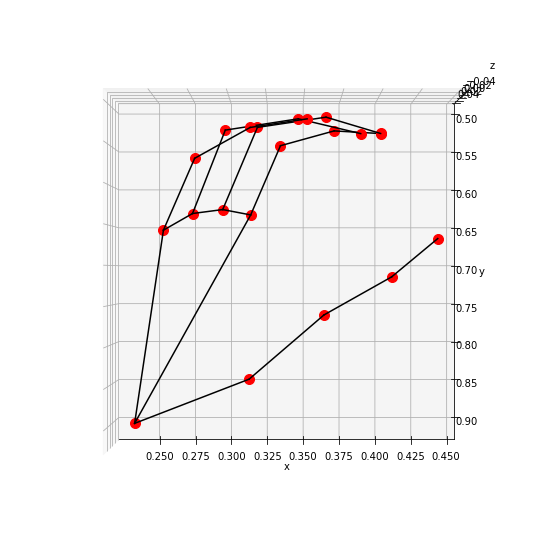

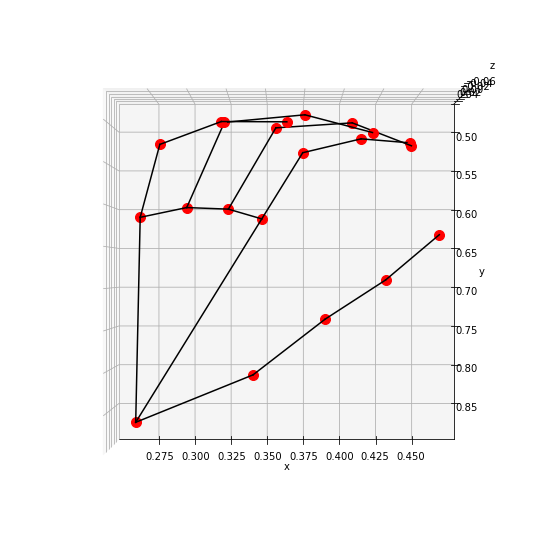

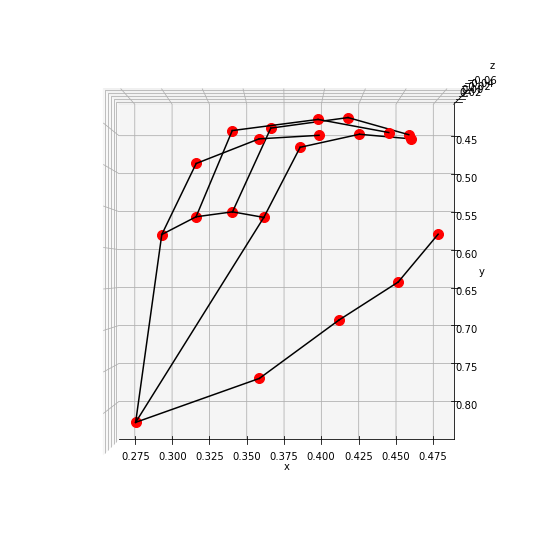

In [44]:
for _, _rh in enumerate(rh):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(-90, -90)
    
    for i in range(0, 21):
        ax.plot(_rh[i][0], _rh[i][1], _rh[i][2], c='red', marker='o', markersize=10)
        for j in p[i]:
            ax.plot([_rh[j][0], _rh[i][0]], [_rh[j][1], _rh[i][1]], [_rh[j][2], _rh[i][2]], color='black')
    
    plt.show()
    time.sleep(.2)

In [229]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD
import tensorflow as tf

import transformers
from transformers import AdamW
import math

In [259]:
train_set = []
for i in range(len(alphabet_rh)):
    label = np.zeros(len(alphabet_rh))
    label[i] = 1.0

    for j in alphabet_rh[i]:
        train_set.append((torch.tensor(j, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)))


In [262]:
BATCH_SIZE = 32
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers = 1)

In [263]:
class ASLModel(nn.Module):
    def __init__(self, outs):
        super().__init__()

        self.decoder = nn.Sequential(
            nn.Linear(21*3, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, outs)
        )

    def forward(self, x):
        return self.decoder(x)

In [264]:
class LRScheduler:
    def __init__(self, opt, max_lr, min_lr, total_steps):
        self.lr = min_lr
        self.optimizer = opt
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.warmup = 0

        self.anneal = total_steps/10
        self.anneal_len = self.anneal*9

        if self.warmup > 0:
            self.warmup_step = (max_lr-min_lr)/self.warmup
        else:
            self.lr = max_lr

        self.curstep = 0
        
    def step(self):
        
        if self.curstep < self.warmup:
            self.lr += self.warmup_step
        elif self.curstep >= self.anneal:
            val = self.curstep-self.anneal
            val = math.sqrt(val * self.anneal_len)
            self.lr = 0.5*(1+math.cos(val*math.pi/self.anneal_len))*(self.max_lr-self.min_lr)+self.min_lr
        

        for param_group in self.optimizer.param_groups:
            param_group['lr'] = self.lr
            
        self.curstep += 1

In [265]:
model = ASLModel(len(alphabet_rh))

In [274]:
EPOCHS = 10
MAX_LR = 2e-5
MIN_LR = 1e-5

In [267]:
prev_accuracy = -1

In [282]:
optimizer = AdamW(model.parameters(), lr = MAX_LR)
criterion = nn.CrossEntropyLoss()

c:\Users\josep\anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [283]:
scheduler = LRScheduler(opt = optimizer, max_lr = MAX_LR, min_lr = MIN_LR, total_steps = EPOCHS * len(train_loader))

for e in range(EPOCHS):
    print("-"*20, e+1, "-"*20)

    model.train()
    for (x, label) in train_loader:
        optimizer.zero_grad()
        outputs = model(x)
        
        loss = criterion(outputs, label)
        loss.backward()
        
        optimizer.step()
        scheduler.step()

    model.eval()
    accuracy = 0
    sum = 0
    for (x, label) in train_loader:
        target = label.detach().numpy()
        output = model(x).detach().numpy()
        
        for op, tg in zip(output, target):
            if tg[np.argmax(op)] == 1:
                accuracy += 1
            sum += 1
    print(accuracy/sum)

-------------------- 1 --------------------
0.9905128205128205
-------------------- 2 --------------------
0.9902564102564102
-------------------- 3 --------------------
0.9903846153846154
-------------------- 4 --------------------
0.9907692307692307
-------------------- 5 --------------------
0.9903846153846154
-------------------- 6 --------------------
0.9905128205128205
-------------------- 7 --------------------
0.9907692307692307
-------------------- 8 --------------------
0.9906410256410256
-------------------- 9 --------------------
0.9903846153846154
-------------------- 10 --------------------
0.9906410256410256


In [280]:
torch.save(model.state_dict(), "model.pt")

In [129]:
alphabet = 'abcdefghijklmnopqrstuvwxyz!'

In [284]:
# (0) in VideoCapture is used to connect to your computer's default camera
capture = cv2.VideoCapture(0)
model.eval()

s = 0
while capture.isOpened():
    # capture frame by frame
    ret, frame = capture.read()

    # resizing the frame for better view
    frame = cv2.resize(frame, (1000, 750))

    # Converting the from BGR to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Making predictions using holistic model
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = holistic_model.process(image)
    image.flags.writeable = True

    # Converting back the RGB image to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Drawing the Facial Landmarks
    draw_styled_landmarks(image, results)
    right_hand = np.array([(res.x, res.y, res.z) for res in results.right_hand_landmarks.landmark] if results.right_hand_landmarks else [(0,)*3]*21).flatten()

    output = model(torch.tensor(right_hand, dtype=torch.float32)).detach().numpy()
    
    # Display the resulting image
    cv2.putText(image, str(alphabet[np.argmax(output)]), (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow("Facial and Hand Landmarks", image)

    # Enter key 'q' to break the loop
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# When all the process is done
# Release the capture and destroy all windows
capture.release()
cv2.destroyAllWindows()